### Use sklearn and hard coded KNN and Weighted KNN function to classify the generated synthetic data

### Importing the libraries

In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split

### Generating a synthetic dataset

[0 1 0 1 0 0 0 1 1 1 2 0 0 2 0 1 2 1 2 1 2 2 2 0 1 2 0 2 1 2]
           x         y  label
0  -0.282571  7.852861      0
1  -1.642489 -3.012940      1
2   1.656480  8.207479      0
3  -5.156198 -2.180306      1
4   0.954440  6.450046      0
5   1.865663  9.072243      0
6   2.211188  8.165970      0
7  -3.668626  0.004571      1
8  -3.333111 -3.478887      1
9  -3.126774 -0.720452      1
10  6.838267 -2.917652      2
11  1.539031  7.859772      0
12  1.108947  9.024002      0
13  5.771467 -2.457150      2
14  0.839320  7.778068      0
15 -1.749793 -1.273353      1
16  6.469382 -3.597305      2
17 -2.419080 -1.581195      1
18  6.831757 -2.323580      2
19 -1.935471 -2.333679      1
20  6.687910 -3.190622      2
21  4.885488 -1.462693      2
22  5.834700 -4.101215      2
23  1.214445  7.767897      0
24 -2.900230 -1.863599      1
25  6.160136 -4.355181      2
26  0.344886  6.351534      0
27  6.892433 -1.215283      2
28 -2.187913 -1.726352      1
29  5.667715 -2.580347      2


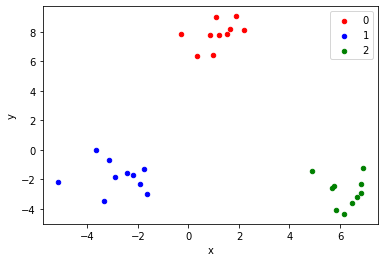

In [92]:
X, y = make_blobs(n_samples=30, centers=3, n_features=2)
print(y)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
print(df)
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Splitting the training and testing dataset

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Writing the algorithm for KNN algorithm

In [94]:
def dist(a, b, p=1):
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    return distance
def knn_predict(X_train, X_test, y_train, k, p):
    from collections import Counter
    y_hat_test = []
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = dist(test_point, train_point, p=p)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist']) 
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])
        prediction = counter.most_common()[0][0]
        y_hat_test.append(prediction)
    return y_hat_test

### Testing the algorithm with generated data

In [95]:
pred=knn_predict(X_train, X_test, y_train, k=5, p=1)
from sklearn.metrics import accuracy_score
data={"Actual":y_test,"Predicted":pred}
ans=pd.DataFrame(data)
print(ans)
print("Accuracy is: ",accuracy_score(y_test, pred))

   Actual  Predicted
0       2          2
1       1          1
2       0          0
3       1          1
4       1          1
5       1          1
Accuracy is:  1.0


### Writing the algorithm for Weighted KNN

In [96]:
def weighted_knn_predict(X_train, X_test, y_train, k, p):
    y_hat_test = []
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            wdistance = dist(test_point, train_point, p=p)
            distances.append(wdistance)
        df_dists = pd.DataFrame(data=distances, columns=['dist']) 
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        tempsum=0
        for i in df_nn.index:
            df_nn.at[int(i),"dist"]=1/df_nn.at[int(i),"dist"]
            tempsum=tempsum+df_nn.at[int(i),"dist"]
        for i in df_nn.index:
            df_nn.at[int(i),"dist"]=df_nn.at[int(i),"dist"]/tempsum
        ans={}
        for i in df_nn.index:
            ans[y_train[int(i)]]=0
        for i in df_nn.index:
            ans[y_train[int(i)]]=ans[y_train[int(i)]]+df_nn.at[int(i),"dist"]
        all_values = ans.values()
        max_value = max(all_values)
        prediction=1
        for i in ans:
            if(ans[i]==max_value):
                prediction=i
        y_hat_test.append(prediction)
    return y_hat_test

### Testing the algorithm with generated data

In [97]:
pred=weighted_knn_predict(X_train, X_test, y_train, k=5, p=1)
from sklearn.metrics import accuracy_score
data={"Actual":y_test,"Predicted":pred}
ans=pd.DataFrame(data)
print(ans)
print("Accuracy is: ",accuracy_score(y_test, pred))

   Actual  Predicted
0       2          2
1       1          1
2       0          0
3       1          1
4       1          1
5       1          1
Accuracy is:  1.0
